In [2]:
import networkx as nx
from matplotlib import pyplot as plt
from pathlib import Path

In [3]:
img_path = Path("./data/")
# initialization, run this before any below. after running this you can freely run in any order
node_type = {
    1: {"color": "w", "stroke": "black"},
    2: {"color": "yellow", "stroke": "black"},
    3: {"color": "orange", "stroke": "black"},
    4: {"color": "red", "stroke": "black"},
    5: {"color": "green", "stroke": "black"},
    6: {"color": "cyan", "stroke": "black"},
    7: {"color": "blue", "stroke": "black"},
    8: {"color": "purple", "stroke": "black"},
    9: {"color": "gray", "stroke": "black"},

}
edge_type = {
    1: {"width": 1.0, "color": "black", "style": "solid"},
    2: {"width": 1.0, "color": "black", "style": "dashed"},
    3: {"width": 2.0, "color": "yellow", "style": "solid"},
    4: {"width": 2.0, "color": "yellow", "style": "dashed"},
    5: {"width": 2.0, "color": "orange", "style": "solid"},
    6: {"width": 2.0, "color": "orange", "style": "dashed"},
    7: {"width": 2.0, "color": "blue", "style": "solid"},
    8: {"width": 2.0, "color": "blue", "style": "dashed"},
    9: {"width": 2.0, "color": "red", "style": "solid"},
    10: {"width": 2.0, "color": "red", "style": "dashed"},
    12: {"width": 1.0, "color": "red", "style": "solid"},
}


def pathtotuple(A):
    return [(A[i - 1], A[i]) for i in range(1, len(A))]


def draw_kwargs_gen(G, pos):
    return {
        "G": G,
        "pos": pos,
        "with_labels": True,
        "node_color": list(nx.get_node_attributes(G, "color").values()),
        "edgecolors": list(nx.get_node_attributes(G, "stroke").values()),
        "width": list(nx.get_edge_attributes(G, "width").values()),
        "edge_color": list(nx.get_edge_attributes(G, "color").values()),
        "style": list(nx.get_edge_attributes(G, "style").values()),
    }


## 演習１２問題２＆３（負荷分散重み決定問題）

In [31]:
from copy import deepcopy
def draw_kwargs_gen(gr, pos):
    return {
        "G": gr,
        "pos": pos,
        "with_labels": True,
        "labels": nx.get_node_attributes(G, "order"),
        "node_color": list(nx.get_node_attributes(gr, "color").values()),
        "edgecolors": list(nx.get_node_attributes(gr, "stroke").values()),
        "width": list(nx.get_edge_attributes(gr, "width").values()),
        "edge_color": list(nx.get_edge_attributes(gr, "color").values()),
        # "connectionstyle": f"arc3, rad = {arc_rad}",
        # "style": list(nx.get_edge_attributes(G, "style").values()),
    }

def draw_graph(gr,pos):
    nx.draw(**draw_kwargs_gen(gr, pos))
    edge_labels = nx.get_edge_attributes(gr, "weight")
    nx.draw_networkx_edge_labels(gr, pos, edge_labels=edge_labels)

def select_edge(gr,positive_edgelist,negative_edgelist):
    edge_weight=[]
    for i in gr.edges():
        if i in positive_edgelist:
            edge_weight.append(1)
        elif i in negative_edgelist:
            edge_weight.append(-1)
        else:
            edge_weight.append(0)
    return edge_weight

G = nx.Graph()
v = [i for i in range(10)]
e = [
    (0, 1, {"weight": 1}),
    (1, 2, {"weight": "e*"}),
    (2, 3, {"weight": 2}),
    (3, 4, {"weight": 1}),
    (5, 6, {"weight": 1}),
    (6, 7, {"weight": 3}),
    (7, 8, {"weight": 4}),
    (8, 9, {"weight": 1}),
    (3, 8, {"weight": 1}),
    (1, 6, {"weight": 1}),
]
pos=[
    [1,1],
    [1,2],
    [1,3],
    [1,4],
    [1,5],
    [2,1],
    [2,2],
    [2,3],
    [2,4],
    [2,5],
]
estar=(1,2)


x_mid=1.5
y_mid=3
pos_fin={v:[(i[0]-x_mid),(i[1]-y_mid)]for v,i in zip(v,pos)}
# print(pos_fin)



G.add_nodes_from(v, **node_type[1])
for i in e:
    G.add_edge(i[0], i[1], **i[2], residue=False, **edge_type[1])


source_dest_pairs=[(0,4),(5,9)]
for idx,i in enumerate(source_dest_pairs,start=2):
    G.add_node(i[0],order="S",**node_type[idx])
    G.add_node(i[1],order="T",**node_type[idx])



draw_graph(G,pos_fin)
plt.savefig(img_path /"ex12-base.png")
plt.clf()


#l-infinity
G_inf=deepcopy(G)
path_1=pathtotuple([0,1,6,7,8,3,4])
path_2=pathtotuple([5,6,7,8,9])
G_inf.add_edge(*estar,weight=float("inf"))
for i in path_1:
    G_inf.add_edge(*i,**edge_type[3])
for i in path_2:
    if(G_inf.get_edge_data(*i)["color"]==edge_type[3]["color"]):
        G_inf.add_edge(*i,**edge_type[7])
    else:
        G_inf.add_edge(*i,**edge_type[5])
draw_graph(G_inf,pos_fin)
plt.savefig(img_path /"ex12-linf.png")
plt.clf()

#l-0
G_0=deepcopy(G)
path_1=pathtotuple([0,1,2,3,4])
path_2=pathtotuple([5,6,1,2,3,8,9])
G_0.add_edge(*estar,weight=0)
for i in path_1:
    G_0.add_edge(*i,**edge_type[3])
for i in path_2:
    if(G_0.get_edge_data(*i)["color"]==edge_type[3]["color"]):
        G_0.add_edge(*i,**edge_type[7])
    else:
        G_0.add_edge(*i,**edge_type[5])
draw_graph(G_0,pos_fin)
plt.savefig(img_path /"ex12-l0.png")
plt.clf()

path_1=pathtotuple([0,1,2,3,4])
path_2=pathtotuple([5,6,7,8,9])
G.add_edge(*estar,weight="]3,7[")
for i in path_1:
    G.add_edge(*i,**edge_type[3])
for i in path_2:
    if(G.get_edge_data(*i)["color"]==edge_type[3]["color"]):
        G.add_edge(*i,**edge_type[7])
    else:
        G.add_edge(*i,**edge_type[5])
draw_graph(G,pos_fin)
plt.savefig(img_path /"ex12-res.png")
plt.clf()

<Figure size 432x288 with 0 Axes>

## 演習１３問題１（イプシロン劣シノプシスを用いたストリームアルゴリズム）

In [87]:
#generate data
from random import gauss
from math import ceil
stream = [ceil(gauss(1000,3)) for i in range(50)]
print(stream)

[1005, 998, 1003, 999, 1001, 1003, 997, 999, 998, 998, 1000, 1003, 1004, 1003, 1003, 999, 998, 1001, 995, 1002, 1004, 996, 1003, 1003, 1001, 998, 1000, 998, 1000, 1000, 1001, 999, 999, 997, 994, 999, 999, 1000, 1003, 999, 1007, 1000, 999, 1001, 996, 1006, 1000, 997, 1001, 1003]


In [90]:
stream=[1005, 998, 1003, 999, 1001, 1003, 997, 999, 998, 998, 1000, 1003, 1004, 1003, 1003, 999, 998, 1001, 995, 1002, 1004, 996, 1003, 1003, 1001, 998, 1000, 998, 1000, 1000, 1001, 999, 999, 997, 994, 999, 999, 1000, 1003, 999, 1007, 1000, 999, 1001, 996, 1006, 1000, 997, 1001, 1003]
N=len(stream)
gamma=0.3
epsilon=0.2
bucket=[ceil(epsilon*(i+1)) for i in range(N)]
D={}
for i in range(N):
    if(bucket[i]!=bucket[i-1] and i!=0):
        deleted=[]
        remain=[]
        keys=list(D.keys())
        # print(keys)
        for j in keys:
            if(D[j][0]<=bucket[i-1]-D[j][1]):
                deleted.append((j,D[j][0],D[j][1]))
                D.pop(j)
            else:
                remain.append((j,D[j][0],D[j][1]))
        print(f"バケット{bucket[i-1]}終了時消去：\n \\[ {deleted} \\]")
        print(f"バケット{bucket[i-1]}終了時の$D$：\n \\[ {remain} \\]")
    if(stream[i] in D):
        D[stream[i]][0]+=1
    else:
        D[stream[i]]=[1,bucket[i]-1]

deleted=[]
remain=[]
keys=list(D.keys())
for j in keys:
    if(D[j][0]<=bucket[-1]-D[j][1]):
        deleted.append((j,D[j][0],D[j][1]))
        D.pop(j)
    else:
        remain.append((j,D[j][0],D[j][1]))
print(f"最終消去：\n \\[ {deleted} \]")
print(f"最終の$D$：\n \\[ {remain} \\]")
ans=[]
keys=list(D.keys())
for j in keys:
    if(D[j][0]>=(gamma-epsilon)*N):
        ans.append(j)
# print(D)
print((gamma-epsilon)*N)
print(ans)

バケット1終了時消去：
 \[ [(1005, 1, 0), (998, 1, 0), (1003, 1, 0), (999, 1, 0), (1001, 1, 0)] \]
バケット1終了時の$D$：
 \[ [] \]
バケット2終了時消去：
 \[ [(1003, 1, 1), (997, 1, 1), (999, 1, 1)] \]
バケット2終了時の$D$：
 \[ [(998, 2, 1)] \]
バケット3終了時消去：
 \[ [(998, 2, 1), (1000, 1, 2), (1004, 1, 2)] \]
バケット3終了時の$D$：
 \[ [(1003, 3, 2)] \]
バケット4終了時消去：
 \[ [(999, 1, 3), (998, 1, 3), (1001, 1, 3), (995, 1, 3), (1002, 1, 3)] \]
バケット4終了時の$D$：
 \[ [(1003, 3, 2)] \]
バケット5終了時消去：
 \[ [(1004, 1, 4), (996, 1, 4), (1001, 1, 4)] \]
バケット5終了時の$D$：
 \[ [(1003, 5, 2)] \]
バケット6終了時消去：
 \[ [] \]
バケット6終了時の$D$：
 \[ [(1003, 5, 2), (998, 2, 5), (1000, 3, 5)] \]
バケット7終了時消去：
 \[ [(1003, 5, 2), (998, 2, 5), (1001, 1, 6), (997, 1, 6), (994, 1, 6)] \]
バケット7終了時の$D$：
 \[ [(1000, 3, 5), (999, 2, 6)] \]
バケット8終了時消去：
 \[ [(1003, 1, 7)] \]
バケット8終了時の$D$：
 \[ [(1000, 4, 5), (999, 5, 6)] \]
バケット9終了時消去：
 \[ [(1007, 1, 8), (1001, 1, 8), (996, 1, 8)] \]
バケット9終了時の$D$：
 \[ [(1000, 5, 5), (999, 6, 6)] \]
最終消去：
 \[ [(1006, 1, 9), (997, 1, 9), (1001, 1, 9), (1003, 1, 

## 添付問題(待ち行列理論)

In [22]:
from math import factorial
def calc_ltd_queue(K,lam,mu):
    p=[]
    rho=lam/mu
    temp=0
    for i in range(K):
        temp+=rho**(i+1)
    p.append(1/(1+temp))
    for i in range(K):
        p.append(p[0]*rho**(i+1))
    # print(p)
    # print(sum(p))
    # # b=(c*rho)**c*p0/(factorial(c)*(1-rho))
    # # Lq=rho/(1-rho)*b
    # # L=Lq+c*rho
    # # Wq=Lq/lam
    # # W=L/lam
    # print("lambda ",lam)
    # print("mu ",mu)
    # print("rho ",rho)
    # print("p0 ",p0)
    # print("b ",b)
    # print("Lq ",Lq)
    # print("L ",L)
    # print("Wq ",Wq)
    # print("W ",W)
    return p
print(calc_ltd_queue(3,45/3600,1/75))
K=1
while(calc_ltd_queue(K,48/3600,1/75)[-1]>0.01):
    # print(calc_ltd_queue(K,48/3600,1/75)[-1])
    K+=1
p=calc_ltd_queue(K,48/3600,1/75)
print(p)
print(len(p))
print(K)

[0.2746965327610489, 0.2575279994634833, 0.24143249949701562, 0.22634296827845216]
[0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01]
100
99


## 添付問題(ネットワーク構造設計)

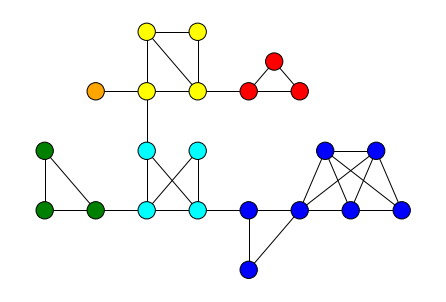

In [43]:
#連結成分分解
from copy import deepcopy

# inputs
G = nx.Graph()
v = [i for i in range(22)]
e = [
    (0, 1, 1),
    (0, 3, 1),
    (0, 4, 1),
    (1, 4, 1),
    (2, 3, 1),
    (3, 4, 1),
    (3, 9, 1),
    (4, 5, 1),
    (5, 6, 1),
    (5, 7, 1),
    (6, 7, 1),
    (8, 13, 1),
    (8, 14, 1),
    (9, 15, 1),
    (9, 16, 1),
    (10, 15, 1),
    (10, 16, 1),
    (11, 12, 1),
    (11, 18, 1),
    (11, 19, 1),
    (11, 20, 1),
    (12, 18, 1),
    (12, 19, 1),
    (12, 20, 1),
    (13, 14, 1),
    (14, 15, 1),
    (15, 16, 1),
    (16, 17, 1),
    (17, 18, 1),
    (17, 21, 1),
    (18, 19, 1),
    (19, 20, 1),
    (18, 21, 1),
]
pos = [
    [3, 5],
    [4, 5],
    [2, 4],
    [3, 4],
    [4, 4],
    [5, 4],
    [6, 4],
    [5.5, 4.5],
    [1, 3],
    [3, 3],
    [4, 3],
    [6.5, 3],
    [7.5, 3],
    [1, 2],
    [2, 2],
    [3, 2],
    [4, 2],
    [5, 2],
    [6, 2],
    [7, 2],
    [8, 2],
    [5, 1],
]
G.add_nodes_from(v, **node_type[1])
G.add_weighted_edges_from(e, **edge_type[1])


# calculate minimum cut for every pair.
min_cut = {
    pairs: nx.minimum_cut(G, *pairs, capacity="weight")[0]
    for pairs in [(i, j) for i in G for j in G if i != j]
}

# k辺連結性分解(c-辺のグループ)
def k_edge_decomposition(G, k):
    nodes = [i for i in G]
    searched = []
    ans = []  # stores the final answer group
    reset = True
    while len(searched) != len(nodes):
        # makes a new group and initiate searching parameters
        if reset:
            search_range = [i for i in nodes if i not in searched]
            now_searching = [search_range[0]]
            searched.append(search_range[0])
            reset = False
        tmp_searched = searched[:]  # to compare if a new element is added to the group

        # for every unsearched element
        for i in [i for i in search_range if i not in now_searching]:
            add_flag = True
            # if there is a cut below c between i and any of now_searching, its not c-edge-connected with the current group
            for j in now_searching:
                if min_cut[(i, j)] < k:
                    add_flag = False
                    break
            # greedy, if we find a matching vertex that we can add, add that. breaks out from the loop
            if add_flag:
                searched.append(i)
                now_searching.append(i)
                break
        # if no vertex is inserted into group, this is a group. start searching from another vertex
        if len(tmp_searched) == len(searched):
            ans.append(now_searching)
            reset = True
        # if a vertex is inserted continue the search (or if all vertex is exhausted add the last group to ans)
        else:
            if len(searched) == len(nodes):
                ans.append(now_searching)
            reset = False
    return ans


# draw

group_id = 2
G_draw = deepcopy(G)
for i in k_edge_decomposition(G, 2):
    for j in i:
        G_draw.add_node(j, **node_type[group_id])
    group_id += 1
draw_kwargs = {
    "pos": pos,
    # "with_labels": True,
    "node_color": list(nx.get_node_attributes(G_draw, "color").values()),
    "edgecolors": list(nx.get_node_attributes(G_draw, "stroke").values()),
    "width": list(nx.get_edge_attributes(G_draw, "width").values()),
    "edge_color": list(nx.get_edge_attributes(G_draw, "color").values()),
    "style": list(nx.get_edge_attributes(G_draw, "style").values()),
}
nx.draw(G_draw, **draw_kwargs)
plt.savefig(img_path / "k-connect.png")


# nx.draw(**draw_kwargs_gen(G, pos))


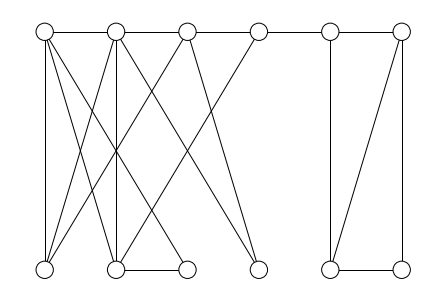

In [7]:
from numpy import argmax
from copy import deepcopy

# inputs
G = nx.Graph()
v = [i for i in range(12)]
e = [
    (0, 1, 1),
    (0, 6, 1),
    (0, 7, 1),
    (0, 8, 1),
    (1, 2, 1),
    (1, 6, 1),
    (1, 7, 1),
    (1, 9, 1),
    (2, 3, 1),
    (2, 6, 1),
    (2, 8, 1),
    (2, 9, 1),
    (3, 4, 1),
    (3, 7, 1),
    (3, 8, 1),
    (3, 9, 1),
    (4, 5, 1),
    (4, 10, 1),
    (5, 10, 1),
    (5, 11, 1),
    (6, 7, 1),
    (7, 8, 1),
    (8, 9, 1),
    (10, 11, 1),
]
G.add_nodes_from(v, **node_type[1])
G.add_weighted_edges_from(e, **edge_type[1])


pos = [
    [1, 2],
    [2, 2],
    [3, 2],
    [4, 2],
    [5, 2],
    [6, 2],
    [1, 1],
    [2, 1],
    [3, 1],
    [4, 1],
    [5, 1],
    [6, 1],
]


# MA alg
adj_list = []
o_count = 1


while len(adj_list) != len(G):
    if not adj_list:
        node = 0
        adj_list.append(node)
        G.add_node(node, order=o_count)
        adj_edge = []
    else:
        adj = []
        for i in G:
            if i in adj_list:
                adj.append([])
            else:
                adj.append([e for e in G[i] if e in adj_list])
        adj_size=[len(i) for i in adj]
        node = argmax(adj_size)
        adj_list.append(node)
        G.add_node(node, order=o_count)
        adj_edge = [(node, i) for i in adj[node]]

    o_count += 1


# reorder based on MA algorithm
priority = nx.get_node_attributes(G, "order")
inverse_priority = {priority[i]: i for i in priority}
neworder = sorted(priority, key=priority.get)

# print(neworder)
index = 1
for i in reversed(neworder):
    # i is the original index
    adj = [priority[e] for e in G[i] if priority[e] < priority[i]]
    adj = sorted(adj)
    # j is priority index
    count = 1
    for j in adj:
        G.add_edge(i, inverse_priority[j], order=count)
        count += 1
    index += 1


draw_kwargs = {
    "pos": pos,
    "with_labels": True,
    "labels": nx.get_node_attributes(G, "order"),
    "node_color": list(nx.get_node_attributes(G, "color").values()),
    "edgecolors": list(nx.get_node_attributes(G, "stroke").values()),
    "width": list(nx.get_edge_attributes(G, "width").values()),
    "edge_color": list(nx.get_edge_attributes(G, "color").values()),
    "style": list(nx.get_edge_attributes(G, "style").values()),
}
edge_labels = nx.get_edge_attributes(G, "order")
nx.draw(G, **draw_kwargs)
nx.draw_networkx_edge_labels(G, pos, edge_labels,label_pos=0.8)


plt.savefig(img_path/"MA.png")

plt.clf()


edges = nx.get_edge_attributes(G, "order")
edges_F = [e for e in edges.keys() if edges[e] <= 2]
# for e in edges_F:
#     G.add_edge(*e,**edge_type[3])
draw_kwargs = {
    "pos": pos,
    "with_labels": False,
    "edgelist": edges_F,
    "labels": nx.get_node_attributes(G, "order"),
    "node_color": list(nx.get_node_attributes(G, "color").values()),
    "edgecolors": list(nx.get_node_attributes(G, "stroke").values()),
    "width": list(nx.get_edge_attributes(G, "width").values()),
    "edge_color": list(nx.get_edge_attributes(G, "color").values()),
    "style": list(nx.get_edge_attributes(G, "style").values()),
}
nx.draw(G, **draw_kwargs)
plt.savefig(img_path/"k-save.png")
